The goal of this program is to read and plot the .root files located in the remote machine at 

xilinx/scratch/Graph_For_Combinatoric/ttbar_allhad_13TeV_PU40/ttbar_allhad_13TeV_PU40_*.root.

The dataset is a Delphes simulation running over the z-axis.

In [57]:
#importing needed libraries
import uproot
import uproot_methods
import numpy as np
import h5py
import pandas as pd

In [2]:
#opening root file
file = uproot.open('/xilinx/scratch/Graph_For_Combinatoric/ttbar_allhad_13TeV_PU40/ttbar_allhad_13TeV_PU40_0.root')

In [3]:
#checking keys
file.keys()

[b'ProcessID0;1', b'Delphes;1']

In [4]:
#checking keys classes
file.classnames()

[(b'ProcessID0;1', 'TProcessID'), (b'Delphes;1', 'TTree')]

In [5]:
#declaring variables to read .root file
treename = 'Delphes'
filename = {}
upfile = {}

In [6]:
#loading .root files
filename['ttbar_0'] = '/xilinx/scratch/Graph_For_Combinatoric/ttbar_allhad_13TeV_PU40/ttbar_allhad_13TeV_PU40_0.root'

upfile['ttbar_0'] = uproot.open(filename['ttbar_0'])

In [7]:
#printing tree content
print(upfile['ttbar_0'][treename].show())

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQCD             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ID1                  TStreamerBasicType         asjagged

In [8]:
#reading tree branches
tree = file['Delphes'] #asigning the tree to a variable
tree.keys()

[b'Event',
 b'Event_size',
 b'Particle',
 b'Particle_size',
 b'EFlowTrack',
 b'EFlowTrack_size',
 b'EFlowPhoton',
 b'EFlowPhoton_size',
 b'EFlowNeutralHadron',
 b'EFlowNeutralHadron_size',
 b'GenJet',
 b'GenJet_size',
 b'GenMissingET',
 b'GenMissingET_size',
 b'Jet',
 b'Jet_size',
 b'Electron',
 b'Electron_size',
 b'Photon',
 b'Photon_size',
 b'Muon',
 b'Muon_size',
 b'MissingET',
 b'MissingET_size',
 b'ScalarHT',
 b'ScalarHT_size',
 b'Rho',
 b'Rho_size',
 b'Vertex',
 b'Vertex_size']

In [18]:
#setting tree branches as a variable (these are arrays of arrays)
#branches = tree.arrays(namedecode='utf-8',flatten=True) #why doesnt it work? (Assertion Error:)
test_array = tree.array(['Jet.Area'],flatten=True)
print(test_array)

[TLorentzVector(x=1.7338, y=-0.62999, z=-3.4184, t=4.0445) TLorentzVector(x=-1.6639, y=0.411, z=0.021349, t=1.992) TLorentzVector(x=-1.3667, y=0.67086, z=2.5687, t=3.1116) ... TLorentzVector(x=1.6964, y=-0.84619, z=-9.6763, t=9.9303) TLorentzVector(x=1.1903, y=0.95636, z=-12.284, t=12.409) TLorentzVector(x=-0.50018, y=-1.477, z=-7.5196, t=7.7313)]


Now that the file has been read, we plot some data out of it.

In [10]:
#setting variables to be plotted
VARS_JET = ['Jet.PT','Jet.Mass']
VARS_GENJET = ['GenJet.PT','GenJet.Mass']

In [11]:
#importing matplotlib to plot and set it so images saves to the folder using inline
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#loading root files into pds dataframes
df = {}
df['ttbar_0_1'] = upfile['ttbar_0'][treename].pandas.df(branches=VARS_JET, flatten=True)
df['ttbar_0_2'] = upfile['ttbar_0'][treename].pandas.df(branches=VARS_GENJET, flatten=True)

(-20.0, 200.0)

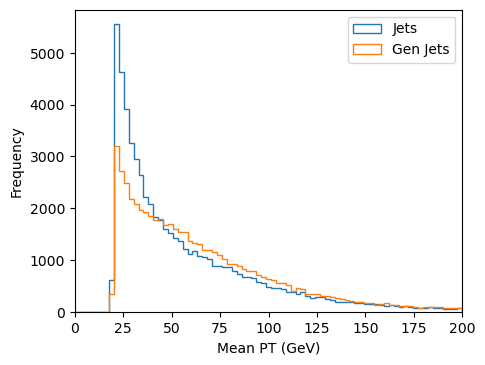

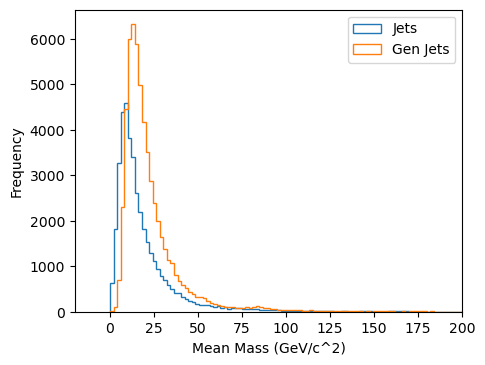

In [13]:
#plotting
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel("Mean PT (GeV)")
bins = np.linspace(0, 200, 80)
df['ttbar_0_1'][VARS_JET[0]].plot.hist(bins=bins, alpha=1, label='Jets',histtype='step')
df['ttbar_0_2'][VARS_GENJET[0]].plot.hist(bins=bins, alpha=1, label='Gen Jets',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,200)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel("Mean Mass (GeV/c^2)")
bins = np.linspace(0, 200, 100)
df['ttbar_0_1'][VARS_JET[1]].plot.hist(bins=bins, alpha=1, label='Jets',histtype='step')
df['ttbar_0_2'][VARS_GENJET[1]].plot.hist(bins=bins, alpha=1, label='Gen Jets',histtype='step')
plt.legend(loc='upper right')
plt.xlim(-20,200)

Now that we've plotted some values out of it, we look to classify each Jet according to its quarks.

In [89]:
#setting jets and particle branches as variables
#namecode=utf-8 eliminates the need to write b before the name
#flatten=True "flattens" the jagged arrays as a single numpy array
jet = tree.arrays(['Jet.PT','Jet.Mass','Jet.Charge','Jet.Eta','Jet.Phi',
                   'Jet.DeltaEta','Jet.DeltaPhi','Jet.Area','Jet_size'],namedecode='utf-8',flatten=True) 
particle = tree.arrays(['Particle.PT','Particle.Mass','Particle.Charge','Particle.Eta','Particle.Phi','Particle.X',
                       'Particle.Y','Particle.Z','Particle.T','Particle_size'],
                       namedecode='utf-8',flatten=True) 

print(jet['Jet_size'].size, jet['Jet.Phi'].size)
print(particle['Particle_size'].size, particle['Particle.Phi'].size)

10000 61784
10000 16183579


In [61]:
#calculating the radius of each jet individually
radius = []
for i in range(jet['Jet.Area'].size):
    radius.append(np.sqrt((jet['Jet.Area'][i].x)**2 + (jet['Jet.Area'][i].y)**2))
    #print(jet['Jet.Area'][i].x,jet['Jet.Area'][i].y,np.sqrt((jet['Jet.Area'][i].x)**2 + (jet['Jet.Area'][i].y)**2))

In [76]:
#creating lorentz vectors using uproot_methods to calculate delta R (sqrt(deltaEta^2 + deltaPhi^2)
jet_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(jet['Jet.PT'],
                                                           jet['Jet.Eta'],
                                                           jet['Jet.Phi'],
                                                           jet['Jet.Mass'])

particle_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(particle['Particle.PT'],
                                                           particle['Particle.Eta'],
                                                           particle['Particle.Phi'],
                                                           particle['Particle.Mass'])

In [90]:
#calculating delta R
#jet_p4.delta_r(particle_p4) #both arrays must be of the same size